<a href="https://colab.research.google.com/github/dineshnain00/CODING-SAMURAI-INTERNSHIP-TASK-/blob/main/Project%205%20%3ATime_Series_Forecasting_for_Stock_Prices_ARIMA_%2B_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

#Step1: Import All the liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
#numpy & pandas → handle numbers and data tables.

#matplotlib → plot graphs.

#yfinance → download stock data from Yahoo Finance.

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#ARIMA → traditional time series model.

#mean_squared_error → to check model accuracy.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

#Sequential, LSTM, Dense → build deep learning model.

#MinMaxScaler → scale values between 0 and 1 (good for neural networks).

In [7]:

#Step 2: Laod data

ticker = "AAPL"   # Change to your stock symbol
data = yf.download(ticker, start="2024-01-01", end="2025-07-01")
data = data[['Close']]
data.dropna(inplace=True)

#Choose Apple stock (AAPL).

#Download daily stock prices from 2018–2024.

#Keep only the Closing Price (last price of the day).

#Remove missing values.

/tmp/ipython-input-2946272014.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2024-01-01", end="2025-07-01")
[*********************100%***********************]  1 of 1 completed


ARIMA RMSE: 16.153873541595818


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

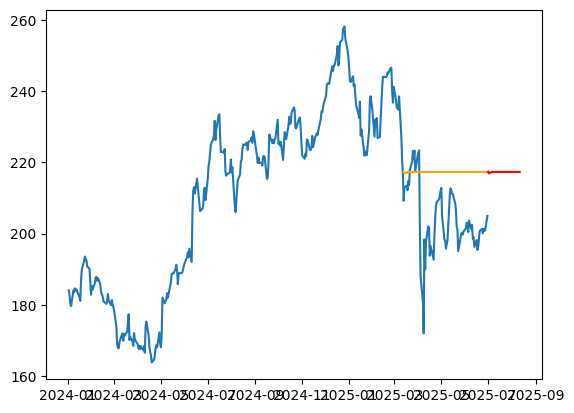

In [8]:
#Step 3: ARIMA Model

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

#Split data → 80% training, 20% testing.


model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

#Build ARIMA model with settings (p=5, d=1, q=0).

#Train (fit) it on training data.


forecast = model_fit.forecast(steps=len(test))

#Predict prices for the test period.


arima_rmse = np.sqrt(mean_squared_error(test, forecast))
print("ARIMA RMSE:", arima_rmse)

#Check error (RMSE) between predicted and actual values.


future_forecast = model_fit.forecast(steps=30)

#Predict next 30 days with ARIMA.


plt.plot(data, label="Historical")
plt.plot(test.index, forecast, label="ARIMA Test Forecast", color="orange")
plt.plot(pd.date_range(data.index[-1], periods=31, freq="B")[1:],
         future_forecast, label="ARIMA Future Forecast", color="red")

#Plot:

#Historical stock prices.

#Predictions on test data.

#Future 30-day forecast.

In [9]:
#Step 4: LSTM Model

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

#Normalize stock prices between 0–1 (important for LSTM).


train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size-60:]

#Use 80% data for training, but keep last 60 days overlap for LSTM.


X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])  # Previous 60 days
    y_train.append(train_data[i, 0])       # Today’s price

#Create sliding windows:

#Input → last 60 days.

#Output → today’s price.



X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#Convert training data into 3D (samples, time steps, features) for LSTM.

In [11]:
#Step 5: Build & Train LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

#Build a neural network with:

#Two LSTM layers (each with 50 neurons).

#One Dense (output) layer → predicts stock price.



lstm_model.compile(optimizer="adam", loss="mean_squared_error")
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

#Train LSTM for 5 passes (epochs) using 32 samples per batch.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.3138
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0308
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0176
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0132
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0106


In [12]:
#Step 6: Test LSTM

X_test, y_test = [], []
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

#Prepare test data (same sliding window).


X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Convert test data into 3D for LSTM.


predictions = lstm_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
real_prices = data[train_size:].values

#Predict stock prices.

#Convert back to original scale (undo normalization).


lstm_rmse = np.sqrt(mean_squared_error(real_prices, predictions))
print("LSTM RMSE:", lstm_rmse)

#Calculate LSTM error (RMSE).

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
LSTM RMSE: 13.096633092724094


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170m

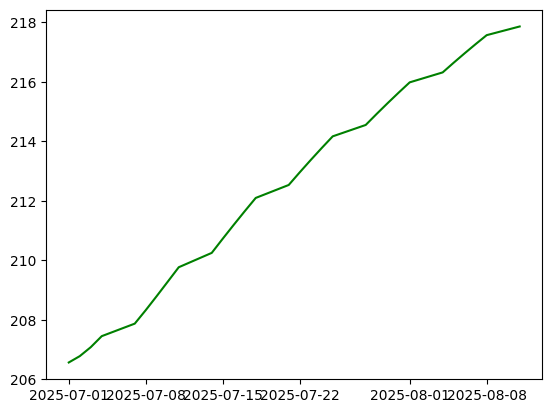

In [13]:
#Step 7: LSTM Future Forecast

last_60_days = scaled_data[-60:]
future_predictions = []

input_seq = last_60_days.reshape(1, 60, 1)

#Take last 60 days of stock data.

#Reshape into input format for LSTM.


for _ in range(30):
    pred = lstm_model.predict(input_seq)[0][0]
    future_predictions.append(pred)

    new_seq = np.append(input_seq[:,1:,:], [[[pred]]], axis=1)
    input_seq = new_seq

#Loop 30 times to predict next 30 days.

#Each new prediction is added back into the input sequence.


future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

#Convert predictions back to actual stock price scale.


future_dates = pd.date_range(data.index[-1], periods=31, freq="B")[1:]
plt.plot(future_dates, future_predictions, color="green", label="LSTM Future Forecast")

#Plot the LSTM next 30 days forecast.